In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/raw/energy_consumption_dataset.csv')
df.head()

,Building_ID,Building_Type,Square_Footage,Age_of_Building,Occupancy_Count,Date,Day_of_Week,Month,Time_of_Day,Outdoor_Temperature,HVAC_Usage,Appliance_Usage,Holiday_Flag,Renewable_Energy_%,Weather_Condition,Energy_Consumption_kWh,Anomaly_Flag,Peak_Usage_Flag,Temp_vs_Consumption_Ratio,Building_Size_Category
0,125,Residential,2882.727120,1,4.0,2023-08-22,Tuesday,August,Evening,79.102869,High,1,0,18.0,Sunny,250.69,0,1,3.169164,Medium
1,36,Residential,2397.797732,9,3.0,2023-05-22,Monday,May,Evening,NaN,Low,1,0,10.0,Cloudy,89.96,0,0,NaN,Medium
2,2,Residential,1930.867849,21,5.0,2023-05-25,Thursday,May,Evening,59.906903,Low,1,0,9.0,Cloudy,87.20,0,0,1.455592,Medium
3,229,Commercial,6696.244285,3,35.0,2023-10-03,Tuesday,October,Day,74.880985,Medium,1,0,0.0,Sunny,377.27,0,0,5.038262,Large
4,97,Commercial,11818.388089,35,16.0,2023-12-24,Sunday,December,Day,35.136324,High,1,0,0.0,Cloudy,397.68,0,0,11.318202,Very Large


In [3]:
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
Building_ID                     0
Building_Type                   0
Square_Footage                  0
Age_of_Building                 0
Occupancy_Count              1000
Date                            0
Day_of_Week                     0
Month                           0
Time_of_Day                     0
Outdoor_Temperature           446
HVAC_Usage                      0
Appliance_Usage                 0
Holiday_Flag                    0
Renewable_Energy_%             73
Weather_Condition               0
Energy_Consumption_kWh          0
Anomaly_Flag                    0
Peak_Usage_Flag                 0
Temp_vs_Consumption_Ratio     446
Building_Size_Category          0
dtype: int64


In [4]:
## Analysing Occupancy Count
print("Datatype of Occupancy Count: ",df['Occupancy_Count'].dtype)

Datatype of Occupancy Count:  float64


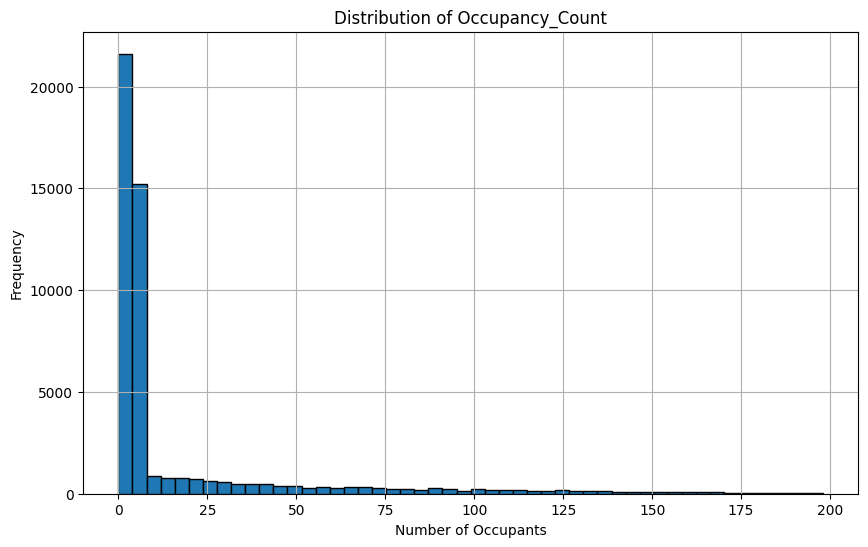

In [8]:
# histogram for the Occupancy Count
# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Occupancy_Count'].dropna(), bins=50, edgecolor='black')
plt.title('Distribution of Occupancy_Count')
plt.xlabel('Number of Occupants')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [9]:
# finding number if building where 0 people are present 
count_zeros = (df['Occupancy_Count'] == 0).sum()
print(count_zeros) 

1006


In [10]:
""" now we will try to understand whether these 0s are true values means no people are there in the building ,
or these are jsut placeholders for nan values means they are jsut NAN values and dont represent correct 0 value."""

# Check if 0s correlate with other features (e.g., HVAC usage)
zero_occupancy = df[df['Occupancy_Count'] == 0]
print(zero_occupancy[['Building_Type', 'HVAC_Usage', 'Energy_Consumption_kWh']].describe())

       Energy_Consumption_kWh
count             1006.000000
mean                59.091843
std                 32.828831
min                  5.181175
25%                 35.180000
50%                 50.955000
75%                 78.072500
max                354.128723


In [11]:
 Replace all illogical 0s with NaN
df.loc[(df['Occupancy_Count'] == 0) & (df['Energy_Consumption_kWh'] > 0), 'Occupancy_Count'] = np.nan

In [12]:
print(f"Missing values after correction: {df['Occupancy_Count'].isnull().sum()}")

Missing values after correction: 2006


In [13]:
from src.utils.visualization import plot_histogram

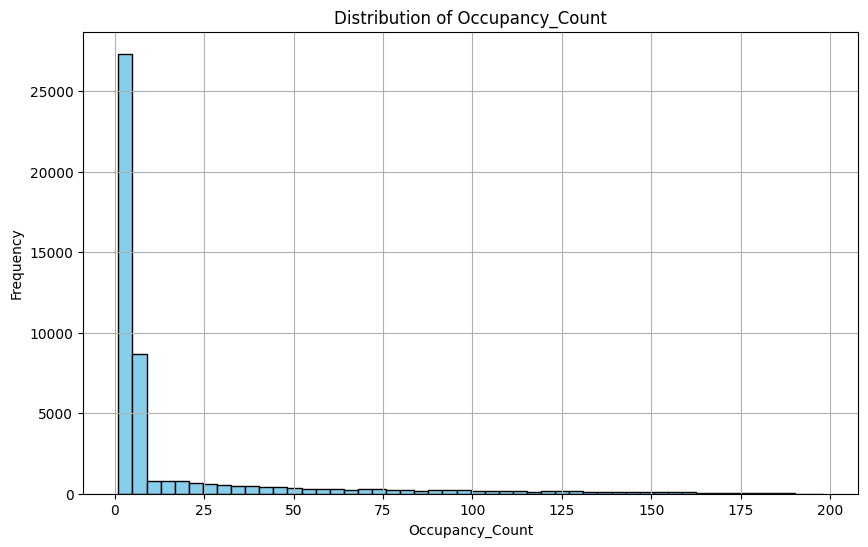

In [16]:
plot_histogram(df,"Occupancy_Count");